In [19]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
col = {
    'skin': 'Skin', 'test': 'Test', 'mass': 'Mass', 'pedi': 'Pedi', 'age': 'Age', 'class': 'Classes'
}

df = df.rename(columns = col)

df.head(3)

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Classes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Classes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.describe(include=[np.number])

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Classes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


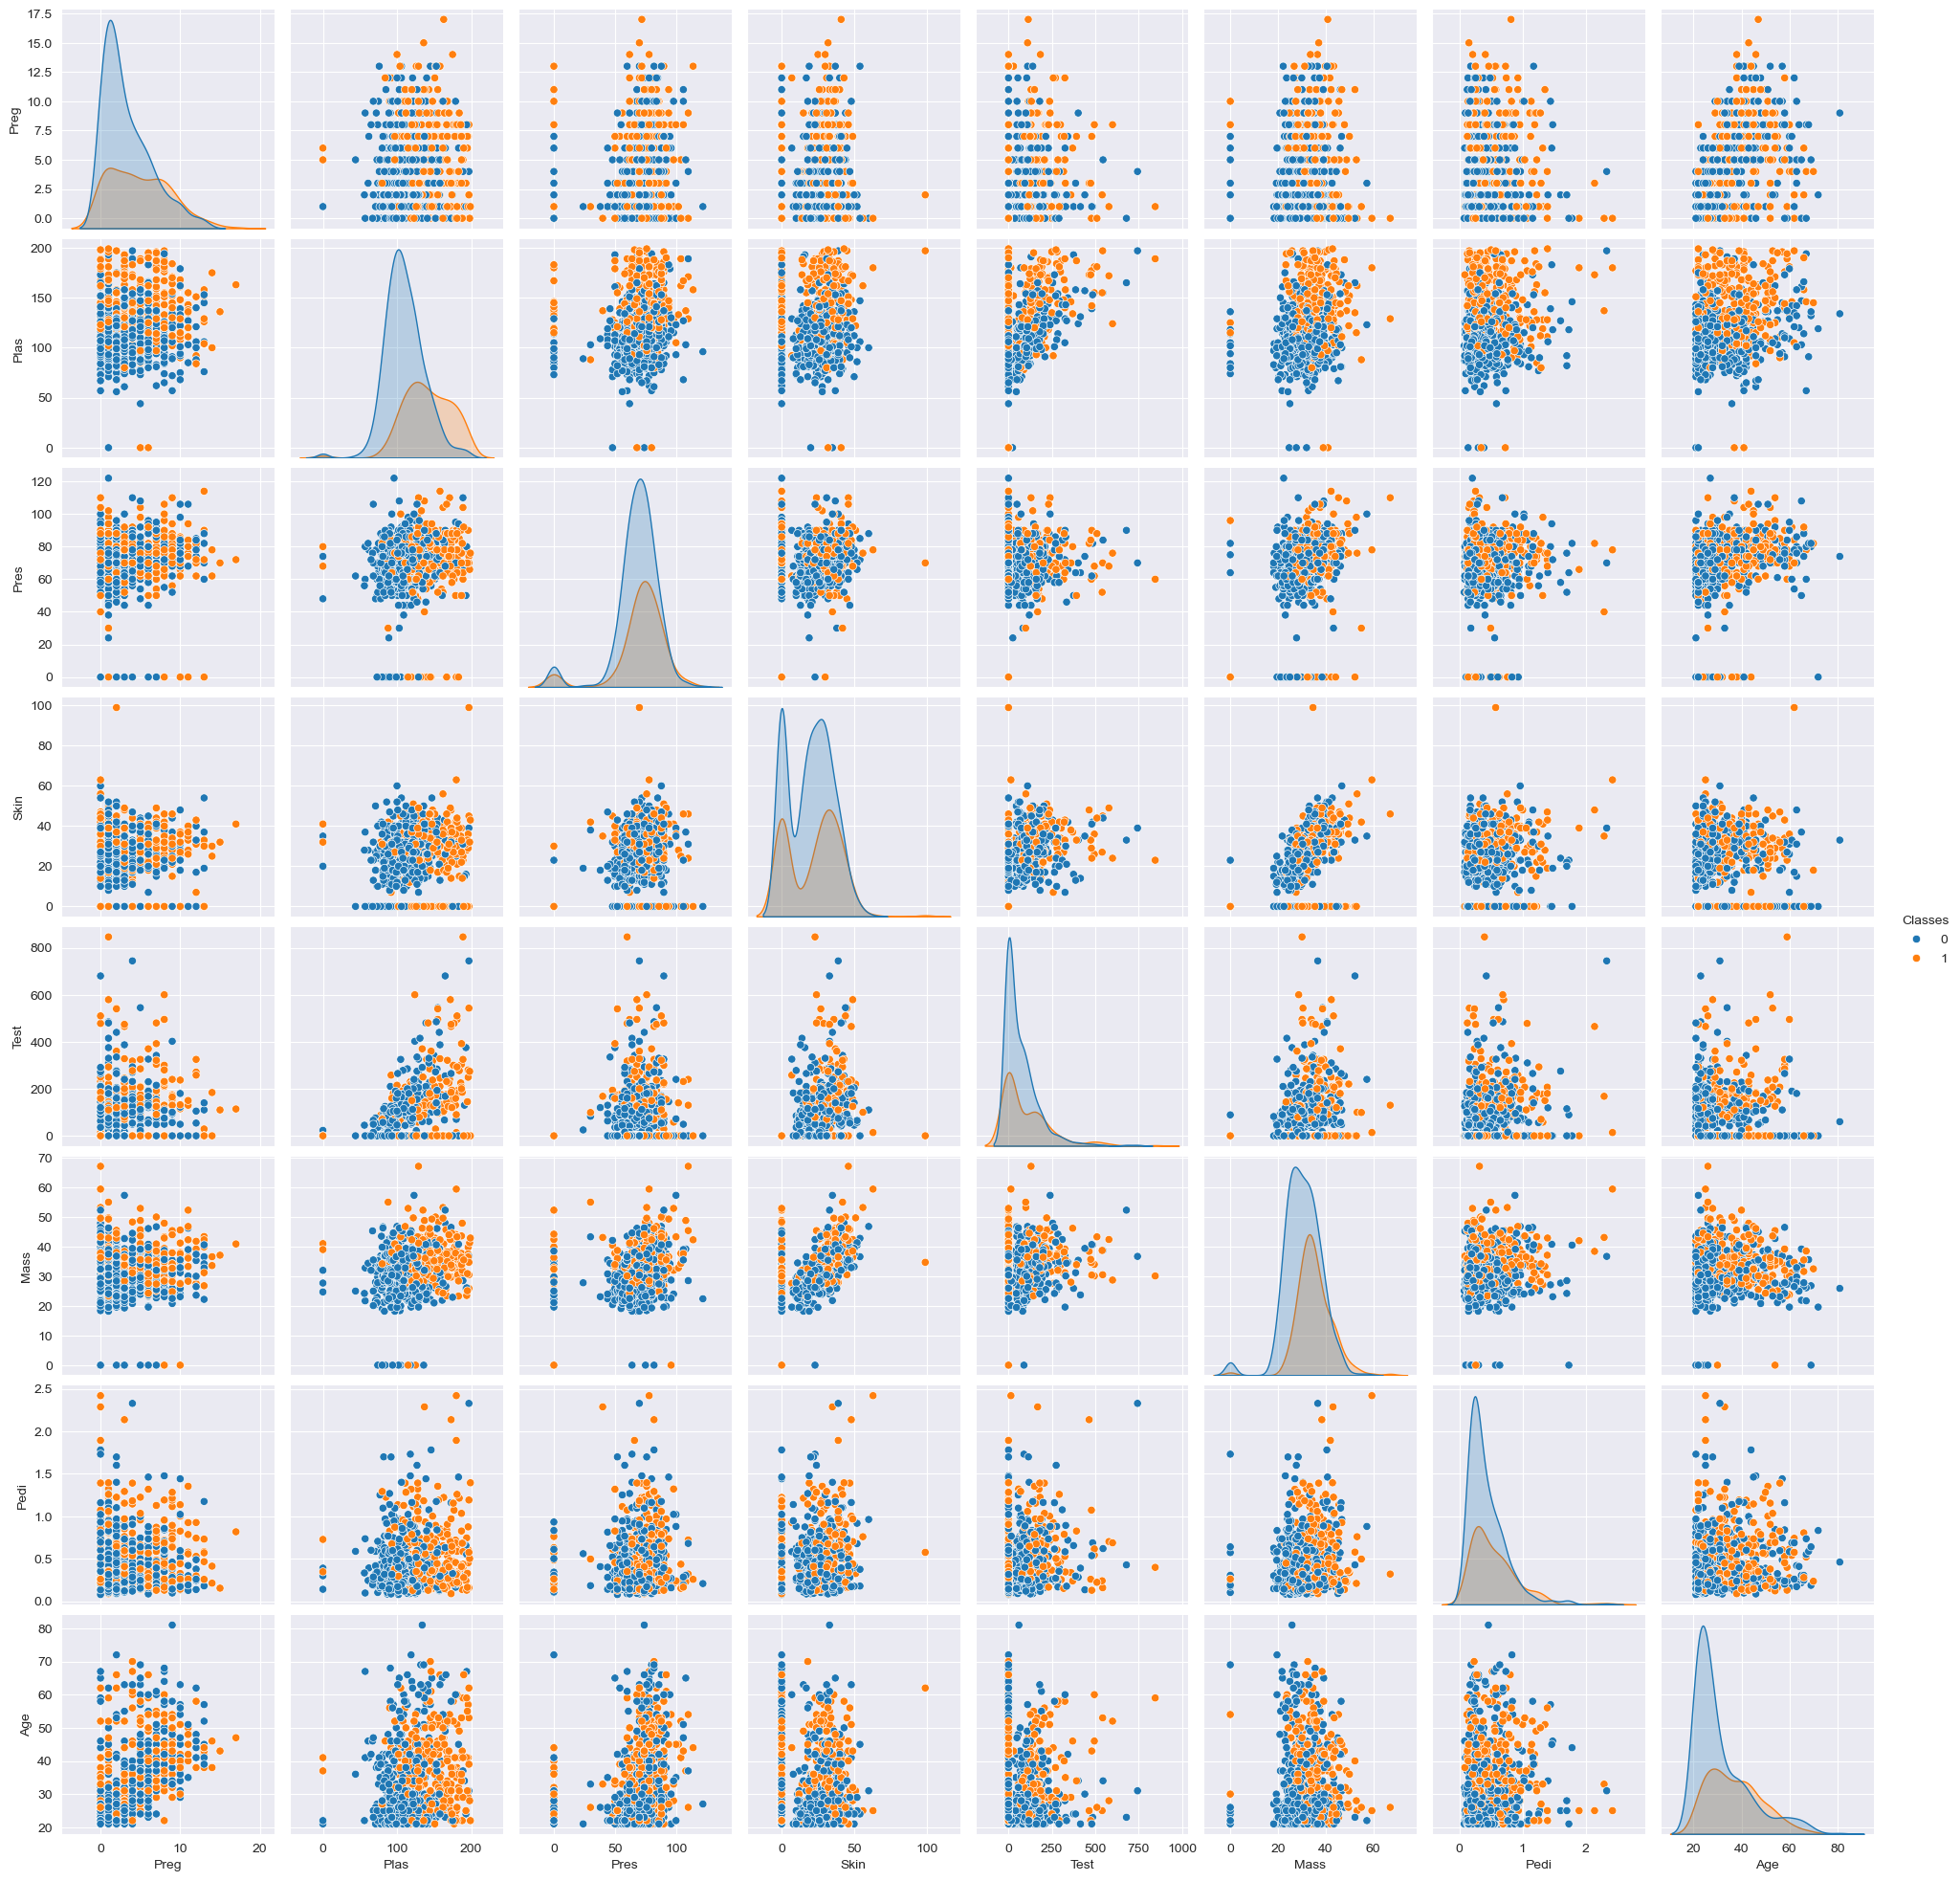

In [7]:
sns.pairplot(df, hue = 'Classes')

In [8]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 42)

In [9]:
dTree = DecisionTreeClassifier(criterion = 'entropy')
dTree.fit(xTrain, yTrain)
dTree.score(xTest, yTest)

0.7229437229437229

In [16]:
importances = pd.Series(dTree.feature_importances_, index=xTrain.columns)
importances = importances.sort_values(ascending=False)
print('Imp\n',importances)

Imp
 Plas    0.287866
Mass    0.209214
Pedi    0.113069
Age     0.111341
Pres    0.101179
Test    0.068408
Preg    0.054873
Skin    0.054050
dtype: float64


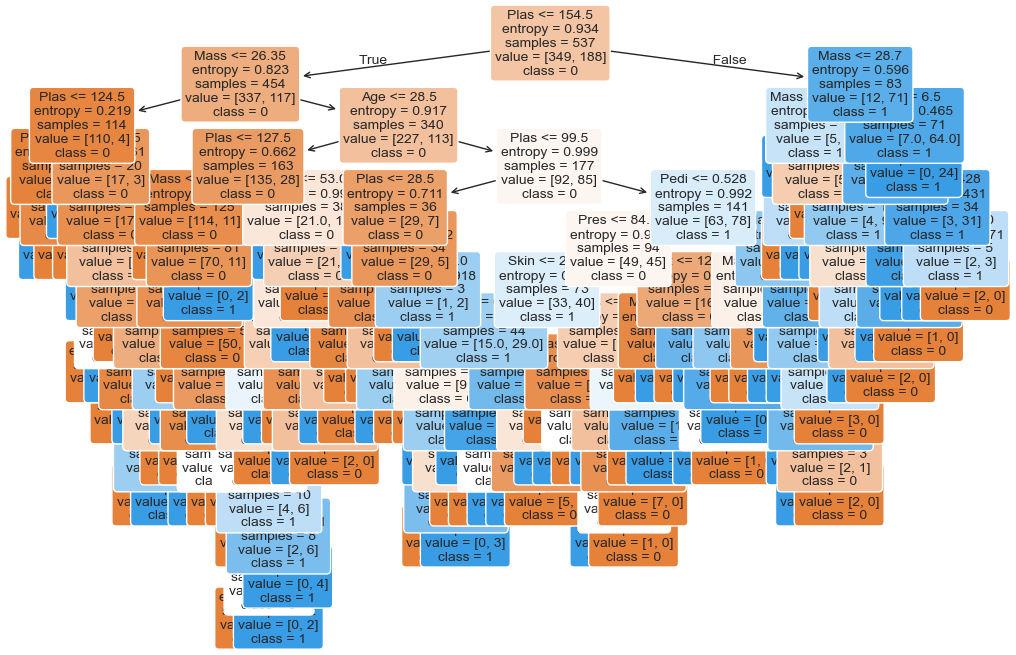

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(dTree, feature_names=xTrain.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)

plt.savefig("decisionTreeDiabetesStarter.png", dpi=300, bbox_inches='tight')
plt.show()

In [23]:
pred = dTree.predict(xTest)

In [25]:
print(dTree.score(xTest, yTest))
print(dTree.score(xTest, pred))

0.7229437229437229
1.0


In [26]:
print(metrics.classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



In [27]:
print(metrics.confusion_matrix(yTest, pred))

[[115  36]
 [ 28  52]]


0.7792207792207793
Imp
 Plas    0.489920
Mass    0.219251
Age     0.139378
Preg    0.056273
Pedi    0.052344
Pres    0.033236
Test    0.009599
Skin    0.000000
dtype: float64


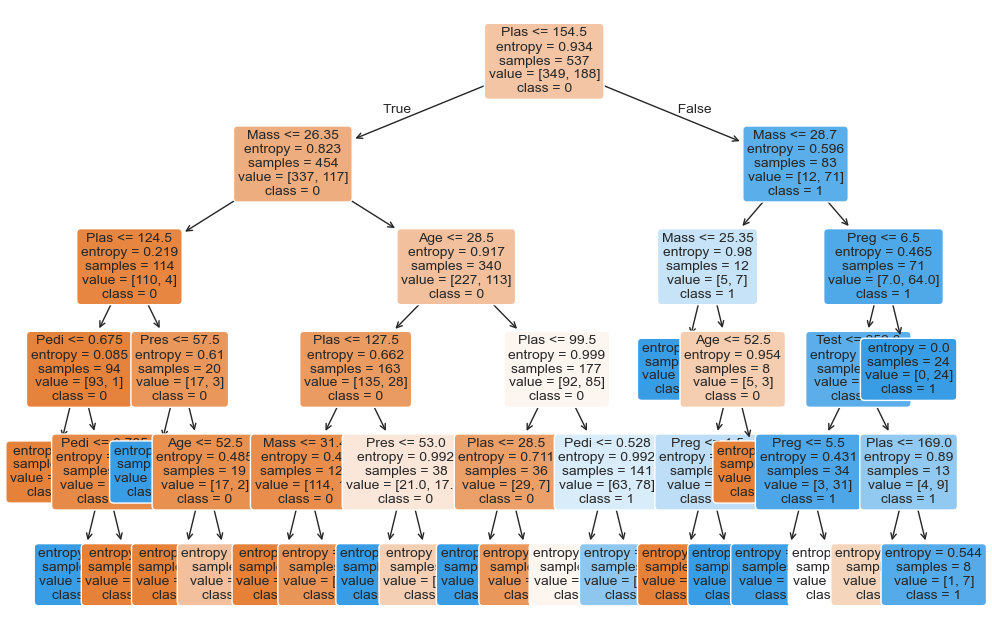

None
0.7792207792207793
1.0
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       151
           1       0.72      0.59      0.65        80

    accuracy                           0.78       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.78      0.77       231

[[133  18]
 [ 33  47]]


In [28]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
dTree.fit(xTrain, yTrain)

print(dTree.score(xTest, yTest))

importances = pd.Series(dTree.feature_importances_, index=xTrain.columns)
importances = importances.sort_values(ascending=False)
print('Imp\n',importances)

plt.figure(figsize=(12, 8))
plot_tree(dTree, feature_names=xTrain.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=10)

print(plt.show())

pred = dTree.predict(xTest)

print(dTree.score(xTest, yTest))
print(dTree.score(xTest, pred))

print(metrics.classification_report(yTest, pred))

print(metrics.confusion_matrix(yTest, pred))